### Problem statement
Project Title : Adding Intelligence to our CRM and improving conversion ratio using
Artificial Intelligence

Project Description : Understanding customer patterns is one of the important activities in
every business, based on customer pattern and customer status our next step was majorly
planned in every business process.

Task-1 : Based on customer status identify the topic whether the customer showing interest
or not towards our product.

Task-2 : Based on location, status and type of business executive identify whether the lead
going to be converted on not.

Task-3:Provide us with product demo on any web application for both task-1 and task-2


Data Description :
Customer Name, Location of the customer, Status whether lead converted or not converted
and description with business executive name which explain about basic conversation
between client and business executive.


In [1]:
import pandas as pd 
import string 
from nltk.corpus import stopwords 

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MADHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
crm = pd.read_excel('1000 leads.xlsx')
crm

,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."
...,...,...,...,...
996,vipin,bangalore,Not Converted,25/4/17(Surendra):please send me details tomor...
997,dheeraj,chennai,Not Converted,"24/4/17(prema): need CT, but our venue is far...."
998,kuldeep singh,bangalore,Not Converted,24/Apr/moHan:intrstd in evng batch trail perd ...
999,ankur sharma,bangalore,Not Converted,1/5/17(Surendra):please share me details 11/5/...


In [4]:
crm['Status information'].isnull().sum()

24

In [5]:
crm.columns

Index(['Lead Name', 'Location', 'Status ', 'Status information'], dtype='object')

In [6]:
crm.isnull().sum()

Lead Name              0
Location              21
Status                 3
Status information    24
dtype: int64

In [7]:
crm["Status "].value_counts()

Not Converted    856
Converted        124
NOt Converted     11
Conveted           7
Name: Status , dtype: int64

In [8]:
crm["Status "].unique()

array(['Not Converted', 'Converted ', 'NOt Converted', nan, 'Conveted'],
      dtype=object)

In [9]:
crm['Status '].replace({"NOt Converted": "Not Converted", "Conveted": "Converted "}, inplace=True)

In [10]:
crm['Status '].value_counts()

Not Converted    867
Converted        131
Name: Status , dtype: int64

In [11]:
crm["Location"].unique()

array(['hyderabad', 'pune', 'bangalore', 'mumbai', 'delhi', 'australia',
       'nagpur', 'madurai', 'mysore', 'chennai', nan, 'kerala', 'hubli',
       'guntur', 'Bangalore', 'Hyderabad', 'jalandhar', 'tiruttani',
       'USA', 'Faridabad', 'Online', 'gurgoan', 'kochi', 'noida',
       'ahmedabad', 'khammam', 'Chennai', 'vishakapatnam', 'solapur',
       'Mumbai', 'nasik', 'Thane', 'UAE', 'Aurangabad', 'rayagada',
       'bilgi', 'gurgaon', 'Rajamundry', 'kadapa', 'aurangabad',
       'kolkatta', 'vijayawada', 'Vijayawada', 'Pune', 'India', 'india',
       'meerut', 'jaipur', 'coimbatore', 'gujarat', 'ghazibad', 'ongole',
       'Nepal', 'Gurgaon', 'bihar', 'thane'], dtype=object)

In [12]:
crm["Location"].mode()

0    bangalore
Name: Location, dtype: object

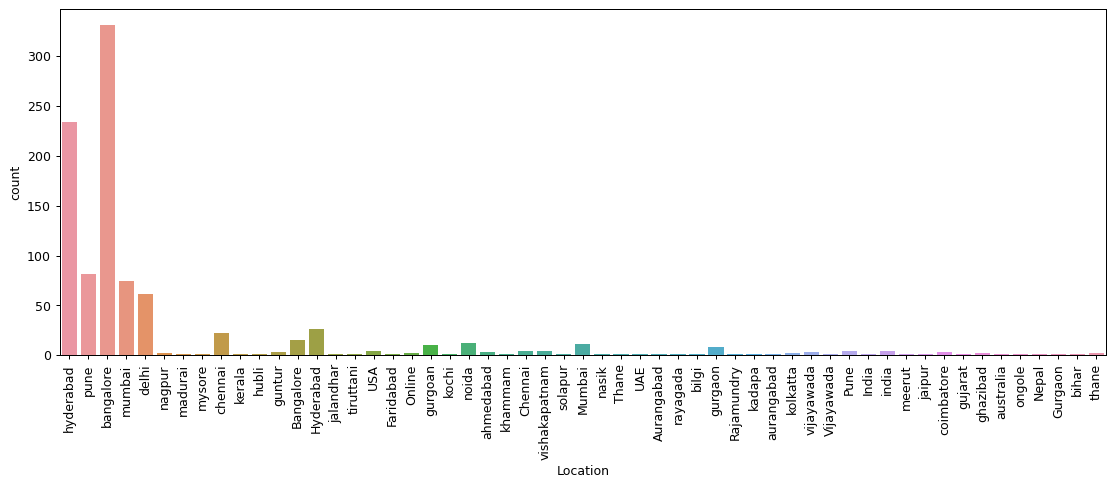

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5), dpi=90)
sns.countplot(data=crm, x="Location")
plt.xticks(rotation="vertical")
plt.show()

In [13]:
crm.dropna(inplace=True)

In [14]:
crm.isnull().sum()

Lead Name             0
Location              0
Status                0
Status information    0
dtype: int64

In [15]:
# def message_text_process(mess):
#     no_punctuation = [char for char in mess if char not in string.punctuation]
#     no_punctuation = ''.join(no_punctuation)
#     return [word for word in no_punctuation.split() if word.lower() 
#             not in stopwords.words('english')]

In [16]:
#crm['Status information'].head(5).apply(message_text_process)

In [17]:
for i in crm["Status information"][:5]:
  print(i)

14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now
14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification
16|AuG|moHan:rnr
14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details


In [18]:
import nltk
nltk.download('Wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading Wordnet: Package 'Wordnet' not found in
[nltk_data]     index
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MADHU\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
pun_word = string.punctuation
stop_words = stopwords.words("english")

In [27]:
#lemmatization
import re
from nltk.stem import WordNetLemmatizer
lamma = WordNetLemmatizer()
def preprocessing(txt):
  x = txt.lower()
  x = re.sub("\d+[/?]\w+[/?]\w+:|\d+[|]\w+[|]\w+:|\d+[/]\w+[/]\w+[(]\w+[)]:?", "", x)
  x = re.sub("int[a-z]+d$", "interested", x)
  x = re.sub("[\d+-?,'.]", "", x)
  x = [i for i in nltk.word_tokenize(x) if i not in stop_words and len(i)>1 and i not in pun_word] 
  x = [lamma.lemmatize(i) for i in x] 
  return " ".join(x)

In [28]:
for i in crm["Status information"][:5]:
      print(preprocessing(i))
     

share detail available evng postponed plan training currently interested
cal tmrw shared detail email share detail email check revert received email im looking asq certification
rnr
want server cal busy reg server
rnr gave info said revert hr planning next month share detail


In [29]:
crm['df'] = crm['Status information'].apply(preprocessing)

In [30]:
crm['df']

0       share detail available evng postponed plan tra...
1       cal tmrw shared detail email share detail emai...
2                                                     rnr
3                         want server cal busy reg server
4       rnr gave info said revert hr planning next mon...
                              ...                        
996     please send detail tomorrow afternoon pm discu...
997     need ct venue far shared detail d want venue n...
998          intrstd evng batch trail perd alrdy reg exlr
999                      please share detail already done
1000    shared detail need cert need call pm meeting c...
Name: df, Length: 956, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
crm['Location']=le.fit_transform(crm['Location'])

In [33]:
crm["Status "].replace({"Not Converted": 1, "Converted ": 0}, inplace=True)

In [34]:
crm

,Lead Name,Location,Status,Status information,df
0,Raja,31,1,"14/8/prema: share me details, available in evn...",share detail available evng postponed plan tra...
1,Anirudh Reddy,48,1,"14/8/prema: cal me tmrw, shared details to ema...",cal tmrw shared detail email share detail emai...
2,Sapna Dewani,19,0,16|AuG|moHan:rnr,rnr
3,suresh,42,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,want server cal busy reg server
4,Akshay Shinde,31,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",rnr gave info said revert hr planning next mon...
...,...,...,...,...,...
996,vipin,19,1,25/4/17(Surendra):please send me details tomor...,please send detail tomorrow afternoon pm discu...
997,dheeraj,22,1,"24/4/17(prema): need CT, but our venue is far....",need ct venue far shared detail d want venue n...
998,kuldeep singh,19,1,24/Apr/moHan:intrstd in evng batch trail perd ...,intrstd evng batch trail perd alrdy reg exlr
999,ankur sharma,19,1,1/5/17(Surendra):please share me details 11/5/...,please share detail already done


In [35]:
crm = crm.reset_index(drop =True)

In [36]:
crm

,Lead Name,Location,Status,Status information,df
0,Raja,31,1,"14/8/prema: share me details, available in evn...",share detail available evng postponed plan tra...
1,Anirudh Reddy,48,1,"14/8/prema: cal me tmrw, shared details to ema...",cal tmrw shared detail email share detail emai...
2,Sapna Dewani,19,0,16|AuG|moHan:rnr,rnr
3,suresh,42,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,want server cal busy reg server
4,Akshay Shinde,31,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",rnr gave info said revert hr planning next mon...
...,...,...,...,...,...
951,vipin,19,1,25/4/17(Surendra):please send me details tomor...,please send detail tomorrow afternoon pm discu...
952,dheeraj,22,1,"24/4/17(prema): need CT, but our venue is far....",need ct venue far shared detail d want venue n...
953,kuldeep singh,19,1,24/Apr/moHan:intrstd in evng batch trail perd ...,intrstd evng batch trail perd alrdy reg exlr
954,ankur sharma,19,1,1/5/17(Surendra):please share me details 11/5/...,please share detail already done


### Imbalance data work

In [37]:
crm['Status '].value_counts()

1    829
0    127
Name: Status , dtype: int64

In [38]:
from sklearn.utils import resample
crm1=crm[crm["Status "]==1]
crm2=crm[crm["Status "]==0]
crm2_upsample = resample(crm2, replace=True,n_samples=600, random_state=10)
crm_upsample= pd.concat([crm1,crm2_upsample],axis=0)

In [39]:
crm_upsample['Status '].value_counts()

1    829
0    600
Name: Status , dtype: int64

In [40]:
crm_upsample

,Lead Name,Location,Status,Status information,df
0,Raja,31,1,"14/8/prema: share me details, available in evn...",share detail available evng postponed plan tra...
1,Anirudh Reddy,48,1,"14/8/prema: cal me tmrw, shared details to ema...",cal tmrw shared detail email share detail emai...
3,suresh,42,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,want server cal busy reg server
4,Akshay Shinde,31,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",rnr gave info said revert hr planning next mon...
5,Karthik,42,1,12/8/17(Surendra):i will check demo(attended d...,check demo attended demo get back think respon...
...,...,...,...,...,...
345,Karan,19,0,7/7/17(soma):Details Shared 11/7/17(soma):Demo...,detail shared demo session shared rnr said con...
595,Mahmeen,48,0,7/6/17(gowtham)details shrd check it n cnfrm 1...,detail shrd check cnfrm rnr cut call cut call ...
338,Prem,31,0,7/7/17(Surendra):RNR 8/7/17(Surendra):call me ...,rnr call tomorrow share detail rnr rnr call co...
33,Pooja TThuse,19,0,8/8/17(soma):Detaills Shared 9/8/17(soma):she ...,detaills shared said next month


In [55]:
pip install wordcloud

     ------------------------------------ 153.3/153.3 kB 286.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
from wordcloud import WordCloud

In [64]:
word =WordCloud(width= 1000, height=600, max_words=25)
notconverted = word.generate(crm[crm["Status "]==1]["df"].str.cat(sep=" "))
converted = word.generate(crm[crm["Status "]==0]["df"].str.cat(sep=" "))

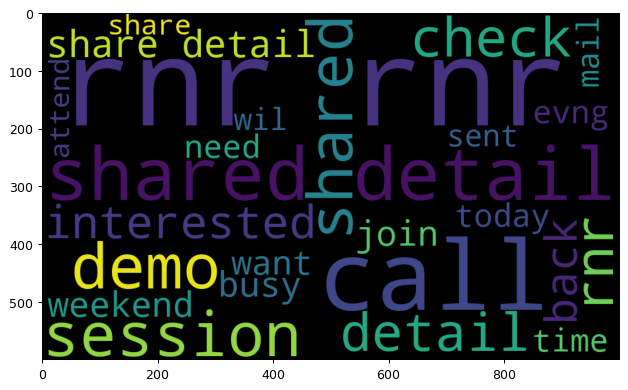

In [66]:
plt.figure(figsize=(10,5),dpi=90)
plt.imshow(notconverted)
plt.show()

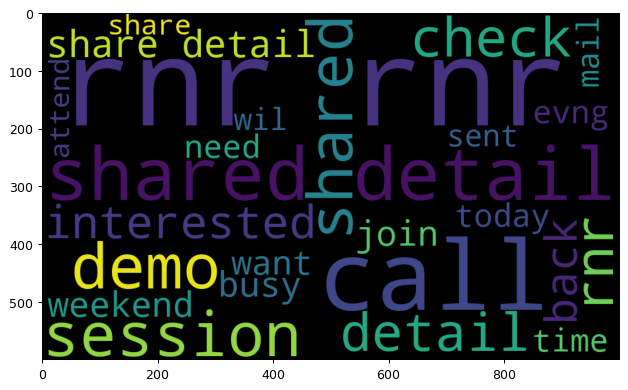

In [67]:
plt.figure(figsize=(10,5),dpi=90)
plt.imshow(converted)
plt.show()

In [41]:
### Task 1 (topic modeling)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
cv = CountVectorizer(max_features=500, ngram_range=(2,2))

In [42]:
vector_txt = cv.fit_transform(crm_upsample["df"])

In [43]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=11,max_iter=5)
lda_top = lda_model.fit_transform(vector_txt)

In [44]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  18.477435711076602 %
Topic  1 :  81.52256428892339 %


In [45]:
lda_top[0]

array([0.18477436, 0.81522564])

In [46]:

#Let us check what are the top words that comprise the topics. This would give us a view of what defines each of these topics
topics = dict()
vocab = cv.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:9]
     tp = "Topic "+str(i)+": "
     topics[tp] = []
     for t in sorted_words:
       topics[tp].append(t[0])
      

E:\Anaconda_python_programfiles\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
for k,v in topics.items():
  print(f"{k} : {v}")

Topic 0:  : ['cut call', 'get back', 'rnr call', 'share detail', 'call disconnected', 'iam busy', 'detail shrd', 'call rnr', 'busy call']
Topic 1:  : ['rnr rnr', 'shared detail', 'share detail', 'detail shared', 'detail rnr', 'rnr shared', 'coverage area', 'need call', 'call pm']


In [48]:

def topic_model():
    user_messages = input("Enter your messages: ")
    x = preprocessing(user_messages)
    x = cv.transform([x])
    lda_x = lda_model.transform(x)
    tpic = []
    tpc = lambda x : "not interested" if x == 0 else "interested"
    for i,topic in enumerate(lda_x[0]):
        print("Topic ",i,": ",topic*100,"%")
        tpc_name = tpc(i)
        prc = topic*100
        tpic.append([tpc_name,prc])
    return tpic

In [49]:
print(crm["Status information"][40])
print(crm["Status "][40])

7/8/17(Surendra):RNR 8/8/17(Surendra):i will get back 16/8/17(Surendra):RNR
0


In [50]:
topic_model()

Enter your messages: 7/8/17(Surendra):RNR 8/8/17(Surendra):i will get back 16/8/17(Surendra):RNR 0
Topic  0 :  87.38500662186232 %
Topic  1 :  12.614993378137685 %


[['not interested', 87.38500662186232], ['interested', 12.614993378137685]]

In [68]:
### classification modeling

In [69]:
tf = TfidfVectorizer(max_features=700)
vector_txt1 = tf.fit_transform(crm_upsample["df"])

In [70]:
vector_txt1.shape

(1429, 700)

In [71]:
#split the data
X=vector_txt1.toarray()
y=crm_upsample["Status "]


In [72]:
#train,test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=20)
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

(1143, 700)
(286, 700)
(1143,)
(286,)


In [73]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [74]:
results=dict()
results["Algorithm"]=[]
results["Accuracy"]=[]
results["Precision"]=[]

In [75]:
for i in [BernoulliNB(), MultinomialNB(), GaussianNB()]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    con_m = confusion_matrix(y_test, y_pred)
    c_r = classification_report(y_test, y_pred)
    p_s = precision_score(y_test, y_pred)
    print(f"Algo: {i}")
    print(f"acc: {acc}\n")
    print("-"*55)
    print(f"{con_m}\n")
    print("-"*55)
    print(f"{c_r}\n")
    results["Algorithm"].append(i)
    results["Accuracy"].append(acc)
    results["Precision"].append(p_s)

Algo: BernoulliNB()
acc: 0.7867132867132867

-------------------------------------------------------
[[ 82  40]
 [ 21 143]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       122
           1       0.78      0.87      0.82       164

    accuracy                           0.79       286
   macro avg       0.79      0.77      0.78       286
weighted avg       0.79      0.79      0.78       286


Algo: MultinomialNB()
acc: 0.8006993006993007

-------------------------------------------------------
[[ 81  41]
 [ 16 148]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.66      0.74       122
           1       0.78      0.90      0.84       164

    accuracy                           0.80       286
   macro avg       0.81      0.78      0.79       286
weighted avg       0.81      0.80   

In [76]:
for i in [ExtraTreesClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    con_m = confusion_matrix(y_test, y_pred)
    c_r = classification_report(y_test, y_pred)
    p_s = precision_score(y_test, y_pred)
    print(f"Algo: {i}")
    print(f"acc: {acc}\n")
    print("-"*55)
    print(f"{con_m}\n")
    print("-"*55)
    print(f"{c_r}\n")
    results["Algorithm"].append(i)
    results["Accuracy"].append(acc)
    results["Precision"].append(p_s)

Algo: ExtraTreesClassifier()
acc: 0.9475524475524476

-------------------------------------------------------
[[121   1]
 [ 14 150]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       122
           1       0.99      0.91      0.95       164

    accuracy                           0.95       286
   macro avg       0.94      0.95      0.95       286
weighted avg       0.95      0.95      0.95       286


Algo: RandomForestClassifier()
acc: 0.9370629370629371

-------------------------------------------------------
[[121   1]
 [ 17 147]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       122
           1       0.99      0.90      0.94       164

    accuracy                           0.94       286
   macro avg       0.94      0.94      0.94       286
weighted avg      

In [77]:
for i in [SVC(), LogisticRegression(max_iter=1000)]:
  model = i.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)

Algo: SVC()
acc: 0.9265734265734266

-------------------------------------------------------
[[111  11]
 [ 10 154]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       122
           1       0.93      0.94      0.94       164

    accuracy                           0.93       286
   macro avg       0.93      0.92      0.92       286
weighted avg       0.93      0.93      0.93       286


Algo: LogisticRegression(max_iter=1000)
acc: 0.8041958041958042

-------------------------------------------------------
[[ 90  32]
 [ 24 140]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       122
           1       0.81      0.85      0.83       164

    accuracy                           0.80       286
   macro avg       0.80      0.80      0.80       286
weighted avg       0.80   

In [78]:
pd.DataFrame(results)

,Algorithm,Accuracy,Precision
0,BernoulliNB(),0.786713,0.781421
1,MultinomialNB(),0.800699,0.783069
2,GaussianNB(),0.709790,1.000000
3,"(ExtraTreeClassifier(random_state=2051546839),...",0.947552,0.993377
4,"(DecisionTreeClassifier(max_features='auto', r...",0.937063,0.993243
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.762238,0.811688
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.832168,0.849398
7,SVC(),0.926573,0.933333
8,LogisticRegression(max_iter=1000),0.804196,0.813953


Among these models, the GaussianNB() model has the highest precision score of 1.00. This means that it has the highest accuracy of positive predictions compared to the other models. Therefore, based on the provided precision scores, the GaussianNB() model would be the best choice in terms of precision

In [79]:
ml = GaussianNB().fit(X_train, y_train)

In [80]:
#task 2
def Status(user):
  x = user
  x = preprocessing(x)
  x = tf.transform([x])
  x = ml.predict(x.toarray())
  if x == 1:
    return "Not Converted"
  else:
    return "Converted"

In [90]:
print(crm["Status information"][15])
print('-'*120)
print(crm["Status "][15])

8|aUg|moHan:intrstd 9|aUg|moHan:intrstd for ML mrg 8.30 12|aUg|moHan:cal back some othr day 16|AuG|moHan:call some othr day 18|AuG|moHan:rnr
------------------------------------------------------------------------------------------------------------------------
0


In [91]:
crm["Status information"][15]

'8|aUg|moHan:intrstd 9|aUg|moHan:intrstd for ML mrg 8.30 12|aUg|moHan:cal back some othr day 16|AuG|moHan:call some othr day 18|AuG|moHan:rnr'

In [92]:
messages1 = input()
Status(messages1)

8|aUg|moHan:intrstd 9|aUg|moHan:intrstd for ML mrg 8.30 12|aUg|moHan:cal back some othr day 16|AuG|moHan:call some othr day 18|AuG|moHan:rnr


'Converted'

### Deployment

In [95]:
### pickle files
import pickle
pickle.dump(cv,open("cv_vectorizer.pkl","wb"))
pickle.dump(lda_model, open("lda_model.pkl","wb"))
pickle.dump(stop_words,open("stop_words.pkl","wb"))
pickle.dump(tf, open("tf_vectorizer.pkl","wb"))
pickle.dump(ml, open("GuassianNB.pkl","wb"))